Demo Tests: Edgar Downloader

In [ ]:
import edgar_downloader as ed

destination_folder = r'C:\Edgar_Unit_Tests\raw_files'

ed.download_files_10k('AAPL', destination_folder, min_date = '2020-01-01')

Demo Tests: Edgar Cleaner

In [ ]:
import edgar_cleaner as ec

source_folder = r'C:\Edgar_Unit_Tests\raw_files'
dest_folder = r'C:\Edgar_Unit_Tests\clean_files'

ec.write_clean_html_text_files(source_folder, dest_folder)

Demo Tests: Ref Data

In [ ]:
import ref_data as rf

In [ ]:
sp100_list = rf.get_sp100()

print(sp100_list)

In [ ]:
sentiment_dictionary = rf.get_sentiment_word_dict()

print(sentiment_dictionary)

In [ ]:
financial_data = rf.get_yahoo_data('2020-01-01', '2023-03-13', 'AAPL')
                                
financial_data.head()

Demo Tests: Sentiment Wordcount

In [ ]:
import edgar_sentiment_wordcount as esw

input_folder = r'C:\Edgar_Unit_Tests\clean_files'
output_file = r'C:\Edgar_Unit_Tests\sentiment_wordcount.csv'

esw.write_document_sentiments(input_folder, output_file)

Demo Tests: Edgar Sentiment Analysis Prep

In [5]:
import edgar_sentiment_analysis_prep as esap

output_file_name = 'sentiment_analysis'
#ticker_list = ['AAPL', 'MSFT', 'XOM', "AMZN", "BRK-B", "GOOGL", "UNH", "GOOG"]
ticker_list = ['AAPL', 'MSFT', 'XOM', "AMZN"]
#ticker_list = ['AAPL', 'MSFT']

dest_folder = r'C:\Edgar_Unit_Tests\Demo'
min_date = '2020-01-01'

esap.full_train_dataset(output_file_name,
                       ticker_list, 
                       dest_folder,
                       min_date = min_date, 
                       user_email = 'gregsmith@kubrickgroup.com')

Successfully created the directory C:\Edgar_Unit_Tests\Demo 


Demo Test: Edgar Data Processing

In [3]:
import edgar_data_processing as edp

file_path = r'C:\Edgar_Unit_Tests\Model_Demo\sentiment_analysis.csv'
target = '1daily_return'
normalised_cols = ['perc_Positive', 'perc_Negative', 'perc_Uncertainty']
z_normalised_cols = ['sentiment_score']
cat_type = 'rel'
categories = {'loss':['lessequal',0], 'profit':['greater',0]}

X_train, y_train, X_test, y_test = edp.get_test_train_split(file_path,
                            target,
                            normalised_cols = normalised_cols,
                            z_normalised_cols = z_normalised_cols,
                            cat_type = cat_type,
                            categories = categories
                            )

display(X_train)
display(list(y_train))
display(X_test)
display(list(y_test))

,perc_Negative,perc_Positive,perc_Uncertainty,sentiment_score
12,0.666633,0.357375,0.516777,3.417239
21,0.087439,0.392254,0.381551,3.537239
23,0.170834,0.424183,0.521550,3.527239
4,0.557140,0.284243,0.688299,3.407239
25,0.284144,0.780681,0.435723,3.627239
14,0.645081,0.456064,0.626103,3.457239
8,1.000000,0.127050,0.115428,3.297239
15,0.704026,0.396158,0.670943,3.427239
1,0.774551,0.065339,0.544360,3.297239
6,0.694257,0.272053,0.494745,3.377239


['loss',
 'profit',
 'profit',
 'profit',
 'loss',
 'profit',
 'profit',
 'loss',
 'loss',
 'loss',
 'profit',
 'profit']

,perc_Negative,perc_Positive,perc_Uncertainty,sentiment_score
9,0.922840,0.153843,0.118530,3.307239
2,0.783443,0.008863,0.633766,3.267239
26,0.294337,1.000000,0.256934,3.687239
5,0.585866,0.278595,0.643649,3.397239
18,0.359784,0.691433,0.807550,3.587239
22,0.155408,0.430820,0.508940,3.537239


['loss', 'loss', 'loss', 'profit', 'profit', 'loss']

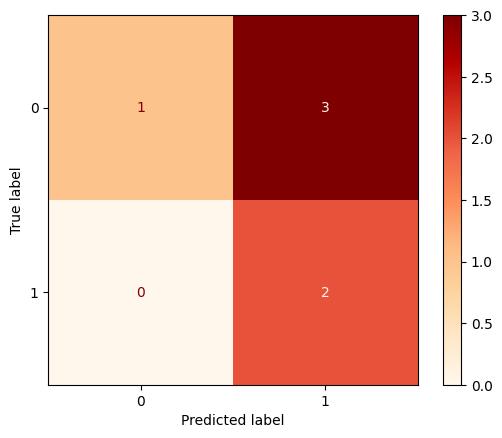

Accuracy score is 0.5


In [4]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators = 50, max_depth = 4, random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot(cmap="OrRd")
plt.show()

acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')